$$
\newcommand{\fudm}[2]{\frac{\mathrm{D} #1}{\mathrm{D} #2}}
\newcommand{\pad}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\ppad}[2]{\frac{\partial^2 #1}{\partial #2^2}}
\newcommand{\ppadd}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}
\newcommand{\nnabla}{\nabla^2}
\newcommand{\eps}{\epsilon}
\newcommand{\vdetail}[1]{\vb{#1}=\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\vb}[1]{\mathbf{#1}}
\newcommand{\va}[1]{\vec{#1}}
\newcommand{\vc}[1]{\begin{pmatrix}#1_1\\#1_2\end{pmatrix}}
\newcommand{\vd}[1]{\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\tb}[1]{\underline{\underline{\mathbf{#1}}}}
\newcommand{\fud}[2]{\frac{\mathrm{d} #1}{\mathrm{d} #2}}
\newcommand{\dd}{\mathrm{d}}
$$


#Flow Field Decomposition

In kinematics we are presented with a flow field $\vb{u}=\vb{u}(x_1,x_2,x_3,t)$ which transports and deforms fluid particles. We now want to understand the basic manipulations of a fluid particle besides a simple transplation. These are:
1. straining
2. shearing
3. rotation

To be more precise, not the absolute amount of for example rotation is of interest but how fast the rotation is, i.e. the rate of rotation. Therefore, all fluid manipulations are with respect to time, and we call them the rate of strain, the rate of shear, and the rate of rotation. Thus the units for these three fluid particle manipulations is [1/T].

The flow field decomposition can be formalized mathematically, yet keep in mind that it serves a physical purpose, i.e. to understand how the flow field locally deforms a fluid particles.
\
If the flow field is homogeneous, thus the fluid velocity is constant along each direction, fluid particles do not deform, although they get transported. Only a velocity gradient can lead to a deformation. This is quantified with the velocity gradient tensor (please note Einstein summation over repeating indices): 

$$du_i=\pad{u_i}{x_j}dx_j=\pad{u_i}{x_1}dx_1+\pad{u_i}{x_2}dx_2+\pad{u_i}{x_3}dx_3 \quad .$$

The index $i$ varies from $1...3$ thus we have actually 9 components of $\fud{u_i}{x_j}$ and can write it as a matrix

$$\nabla \vb{u}=
\left( \begin{array}{ccc}
\pad{u_1}{x_1} & \pad{u_1}{x_2} & \pad{u_1}{x_3} \\
\pad{u_2}{x_2} & \pad{u_2}{x_2} & \pad{u_2}{x_3} \\
\pad{u_3}{x_3} & \pad{u_3}{x_2} & \pad{u_3}{x_3} \end{array} \right)
$$

Thus above equation can be written with the definition of the velocity gradient tensor as $d\vb{u}=\nabla \vb{u}\, d\vb{x}$.

But how do connect the velocity gradient tensor with the fluid deformation. To answer this we need first to look at a decompostion (separation) of a matrix into a symmetric and antisymmetric part. Any 3x3 matrix can be decomposed using the following identity:

$$B_{ij}=\frac{1}{2} \left( B_{ij} +B_{ji}\right) + \frac{1}{2} \left(B_{ij}-B_{ji}\right)\quad .$$

A symmetric matrix $\tb{S}$ has the property $\tb{S}=\tb{S}^T$ or $S_{ij}=S_{ji}$ while an asymmetric matrix changes sign upon transposing, i.e. $\tb{A}^T=-\tb{A}$ or $A_{ij}=-A_{ji}$.

Please check this decomposition using this example:

In [69]:
import numpy as np  
from scipy import math

#random 3x3 matrix filled with random integers between -9 and 9
B= np.random.random_integers(-9,9,(3,3)) 
#a symmetric matrix
S=1./2.*(B+B.T)
#an antisymmetric matrix
A=1./2.*(B-B.T)
#print all them
print B
print S
print A

[[ 4 -7 -9]
 [ 2 -8 -8]
 [-6  7  1]]
[[ 4.  -2.5 -7.5]
 [-2.5 -8.  -0.5]
 [-7.5 -0.5  1. ]]
[[ 0.  -4.5 -1.5]
 [ 4.5  0.  -7.5]
 [ 1.5  7.5  0. ]]


Above example starts with 9 independent components in matrix $\tb{B}$. How many independent components do we have in $\tb{S}$ and in $\tb{A}$?

Coming back to the velcoity gradient tensor, we now apply the same decomposition and give names to the two tensors.

$$\nabla \vb{u}=\frac{1}{2} \left( \pad{u_i}{x_j}+\pad{u_j}{x_i}\right) + \frac{1}{2} \left( \pad{u_i}{x_j}-\pad{u_j}{x_i}\right)=S_{ij} + \frac{1}{2} R_{ij}$$

where $S_{ij}$ is named the rate of shear tensor and $R_{ij}$ is the rotation tensor. For convenience at some later stage we define the rotation tension as twice the antisymmetric tensor.


##Rate of Strain 



We can define the rate of strain in $x_1$-directoon as the rate of change of an infinitesimal length $\delta x_1$. In mathematical language this can be written as

$$\frac{1}{\delta x_1}\fudm{}{t} \frac{\overline{A'B'}-\overline{AB}}{\overline{AB}}$$

where the distance $\overline{AB}$ is the initial length of the fluid particle and $\overline{A'B'}$ afterwards. The unit of this quantity is [1/T].

Now looking at above figure we can connect express the distances through the flow field variables and the time $dt$.


<img src="pics/ffd_fig1.png" width=450> <p>

$$\lim_{dt\rightarrow 0}\frac{1}{dt}\frac{\delta x_1 +\left(u_1+\pad{u_1}{x_1}\delta x_1\right) dt - u_1 dt}{\delta x_1}=\pad{u_1}{x_1}$$

Only the gradient of the velocity component along the velocity direction contributes to the rate of strain of a fluid particle in that direction. Above analysis can be repeated to the strain in the other two directions with similar results. In general, the rates of strain populate the diagonal of the velocity gradient tensor and the rate of shear tensor.


##Rate of shear

Shear is the deformation a deck of cards experiences when you move the uppermost cards horizontally. A square deforms due to shear into a rhombus, right angles become tilted. The rate of shear is the rate at which the average angle of the fluid particle changes.

This can be put into a mathematical language as

$$\frac{1}{2}\fudm{(d\alpha + d\beta)}{t}$$

<img src="pics/ffd_fig2.png" width=450> <p>

Above figure depicts the pure shearing of a square fluid particle, only the angles change, not the length or height. The angles are thus given by the $\sin d\alpha\approx\tan d\alpha\approx d\alpha$. Please carefully inspect the definition of the angles, one of them is counterclockwise and while the second is clockwise. The reason is that we want to quantify shear. If however we define the angles in the same direction, we would measure rotation (which will be done below).

$$\lim_{dt\rightarrow 0} \frac{1}{2 dt}\left(\frac{1}{\delta x_2}\left(\pad{u_1}{x_2}\delta x_2 dt\right)+\frac{1}{\delta x_1}\left(\pad{u_2}{x_1}\delta x_1 dt\right)\right)=\frac{1}{2}\left(\pad{u_1}{x_2}+\pad{u_2}{x_1}\right)$$

You will notice that above expression for the rate of shear is identical to the elements of the rate of shear tensor $S_{12}$. As the rate of shear tensor is symmetrical, it is also identical to $S_{21}$. 


##Fluid Rotation

As the last fluid deformation we have a look at the rotation of the fluid element. Instead of analyzing the sum of the two angles of above figure, we now look for the difference. We will be using the mathematical postive sense of rotation (counterclockwise). Then the average rotation of the fluid particle is

$$\frac{1}{2}\fudm{(-d\alpha + d\beta)}{t}$$

which can be written analogous to above derivation, but noting the minus sign, i.e. 

$$\lim_{dt\rightarrow 0} \frac{1}{2 dt}\left(-\frac{1}{\delta x_2}\left(\pad{u_1}{x_2}\delta x_2 dt\right)+\frac{1}{\delta x_1}\left(\pad{u_2}{x_1}\delta x_1 dt\right)\right)=\frac{1}{2}\left(-\pad{u_1}{x_2}+\pad{u_2}{x_1}\right)$$

The last expression can be identified with the element $\frac{1}{2}R_{21}$ which is equal to $-\frac{1}{2}R_{12}$ (why?).
The 3 independent components of the rotation tensor is thus populated with twice the rotation rate. Why is there a factor or 2?

We can use the curl-operator on the velocity field, i.e. 

$$\va{\omega}=\left(\omega_1,\omega_2,\omega_3\right)^T=\nabla \times \vb{u}\quad ,$$

where $\va{\omega}$ is called the vorticity. By inspection we can identify the elements of the rotation tensor $\tb{R}$ with the elements of the vorticity vector, e.g.

$$\tb{R}=\left( \begin{array}{ccc}
0 & -\omega_3 & \omega_2\\
\omega_3 & 0 & -\omega_1 \\
-\omega_2 & \omega_1 & 0 \end{array} \right)\quad .$$



##Principle Direction of Rate of Strain (Eigenvalues and Eigenvectors of a Symmetric Tensor)

We want to understand what are the directions in which the rate of strain tensor $S_{ij}$ is deforming a fluid particle. This task can rather easly be accomplished using some of our knowledge from linear algebra which says: Any symmetric tensor (with real elements) can be transformed into a new coordinate system that all elements of the tensors are 0, except for the elements on the diagonal, $S'_{ij}$. The coordinate axis are parallel to the eigenvectors of the symmetric tensor, i.e. the rate of strain tensor. This new (rotated/flipped) coordinate axis are named the principle axis of $S'_{ij}$. In this coordinate system the strain is acting only along these axis. 

Let's do the mathematics first and then apply in an example.

1.) To calculate the eigenvectors of the symmetric tensor we need to obtain the eigenvalues, $\lambda^k$ with $k=1,2,3$. They are the solution to the equation

$$\det \left| S_{ij} -\lambda \delta_{ij}\right|=0\quad.$$

2.) The eigenvectors $\vb{b}$ are the vectors fulfilling the equation

$$\left(\tb{S}-\lambda \tb{\delta}\right)\vb{b}=\vb{0}\quad .$$

3.) In the coordinate system where the unit vectors coincide with the eigenvectors the tensor has only diagonal elements, thus:

$$\tb{S'}=\left( \begin{array}{ccc}
\lambda^1 & 0 & 0\\
0 & \lambda^2 & 0 \\
0 & 0 & \lambda^3 \end{array} \right)\quad .$$

In summary, we need to find the eigenvalues, can write $\tb{S'}$, and need the eigenvectors a new coordinate system. Let's do an example.

##Example

Let's consider a two-dimensional parallel flow in the $x_1$-direction. This could be a boundary layer flow as sketched:

<img src="pics/ffd_fig3.png" width=350>

The velocity field then is 

$$\vb{u}=\left( \begin{array}{c}
u_1(x_2) \\
 0  \end{array} \right)\quad .$$

Although not immediately obvious this flow is named a shear flow, i.e. it shears a fluid particle. We now want to understand in which direction of the flow the shear is vanishing and only a straining flow is observed. If you don't understand the last sentence please continue, it will become clear shortly.

The rate of strain tensor 

$$S_{ij}=\frac{1}{2} \left( \pad{u_i}{x_j}+\pad{u_j}{x_i}\right)$$ 

becomes 

$$\tb{S}=\left( \begin{array}{cc}
0 & \Gamma \\
\Gamma & 0 \end{array} \right)\quad ,$$

with $\Gamma=\pad{u_1}{x_2}$.

Now we need to find the eigenvalues, which are determined from 

$$\det \left| S_{ij}-\lambda\delta_{ij}\right|= \det \left|
\begin{array}{cc}
-\lambda & \Gamma \\
\Gamma & -\lambda \end{array}\right|=0\quad .$$

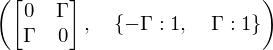

In [70]:
from sympy import * #tools for doing sympbolic algebra
init_printing() #nice output
x = Symbol('Gamma') #define our symbolic variable
M = Matrix([[0,'Gamma'],['Gamma',0]]) #this is a symbolic matrix
M,M.eigenvals() #prints the matrix, and the eigenvalues and their multiplicity 

Thus there two unique eigenvalues, $\lambda^1=-\Gamma$ and $\lambda^2=\Gamma$.

The eigenvectors are vectors which do not change under multiplication with the matrix $\tb{S}$. Let's name the first eigenvector $\vb{b}^1$ and is the solution to this vector equation:

$$\left( \begin{array}{cc}
0 & \Gamma \\
\Gamma & 0 \end{array} \right) 
\left( \begin{array}{c}
b^1_1 \\
b^1_2 \end{array} \right)=
\lambda^1
\left( \begin{array}{c}
b^1_1 \\
b^1_2 \end{array} \right)\quad .
$$

This results into two equations with two unknowns. We can use python to solve this, actually it is just a single line:

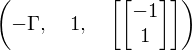

In [71]:
M.eigenvects()[0] #prints the first eigenvalue, multiplicity and eigenvector

The second eigenvector can be obtained in the same way, either you doing the math or ask python.

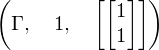

In [72]:
M.eigenvects()[1] #Here we use 1 for the second eigenvector, note that python starts always with 0

Thus the unit vectors of $\tb{S}$ are 

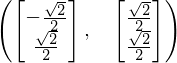

In [73]:
M.eigenvects()[0][2][0]/M.eigenvects()[0][2][0].norm(),\
M.eigenvects()[1][2][0]/M.eigenvects()[1][2][0].norm()

In a coordinate system spun by these two unit vectors $\vb{e'}_1$ and $\vb{e'}_2$.

<img src="pics/ffd_fig4.png" width=350>

the rate of strain tensor $\vb{S}$ transforms into

$$\tb{S'}=\left( \begin{array}{cc}
-\Gamma & 0\\
0 & \Gamma \end{array} \right)\quad .$$

Your work:

Show that the shearing of a square fluid particle is indeed transformed into a compression/expansion along the new coordinate axis $(e'_1,e'_2)$.



In [74]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()
